In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import csv
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/wltrimbl/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} numpy matplotlib pandas nltk word2vec gensim


In [185]:
def loadTwitterdata():
    '''# Load  "Twitter US Airline Sentiment". It can be found on kaggle 
    https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
    and contains ~15000 tweets on airline-relevant topics from 2015. 
    '''

    def load_data(filename):
        rtn = []
        #open the file with the csv reader
        with open(filename, newline='') as csvfile:
            tweets = csv.reader(csvfile, delimiter=',', quotechar='"') 
            next(tweets)#skip the header   
            for row in tweets:
                rtn.append(row[10])
        return rtn
    tweets = load_data('Tweets.csv')
    #figure out how much data we have
    size = sum([i.__sizeof__() for i in tweets]) + tweets.__sizeof__()
    print('Number: ', len(tweets), '\t Size:', size/1e6,'MB','\t Bytes per tweet:', size/len(tweets))
    return(tweets)
    
tweets = loadTwitterdata()


Number:  14640 	 Size: 2.54024 MB 	 Bytes per tweet: 173.5136612021858


In [187]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
# the word vectors, a 3M x 300 matrix, must be downloaded.
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# object-oriented everything, we must create an instance of the word2vec engine
wv = gensim.downloader.load('word2vec-google-news-300')

In [189]:
# According to https://stackoverflow.com/questions/35596031/gensim-word2vec-find-number-of-words-in-vocabulary 
# wv acts like a dictionary. 
len(wv)  # gives me the number of items in vocabulary.

3000000

In [191]:
wv["Chicago"]

array([-0.07861328,  0.3125    , -0.00552368,  0.40820312,  0.01104736,
        0.21582031, -0.4140625 ,  0.22265625,  0.08105469, -0.14453125,
        0.04052734,  0.24707031, -0.00726318, -0.12597656,  0.33789062,
        0.03198242,  0.01055908, -0.12988281,  0.0111084 , -0.15039062,
       -0.1015625 , -0.10644531,  0.00326538, -0.04711914,  0.09716797,
        0.20800781, -0.05078125,  0.3046875 , -0.27539062,  0.08105469,
        0.21875   , -0.20410156, -0.10693359, -0.04833984,  0.12988281,
        0.18847656, -0.03100586,  0.05566406,  0.11474609,  0.12353516,
        0.05322266, -0.13867188,  0.04394531, -0.10058594, -0.54296875,
        0.26757812, -0.02661133, -0.18261719,  0.20214844,  0.09326172,
        0.265625  ,  0.29882812, -0.03149414, -0.33007812, -0.11865234,
        0.19921875, -0.05444336, -0.06005859, -0.3046875 , -0.07421875,
       -0.08984375,  0.01696777,  0.02758789,  0.20214844, -0.00245667,
        0.03881836,  0.10205078,  0.06982422, -0.02661133,  0.14

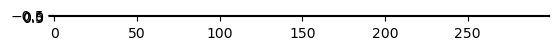

In [193]:
plt.imshow(wv["Chicago"].reshape((300,1)).T )

Meh, not the most brilliant visualization here

(array([ 2.,  0.,  0.,  0.,  2.,  2.,  3.,  7.,  3.,  7., 10.,  9., 12.,
        22., 21., 24., 21., 33., 22., 18., 24., 13.,  9., 14.,  7.,  6.,
         5.,  2.,  1.,  1.]),
 array([-0.54296875, -0.51126301, -0.47955731, -0.44785157, -0.41614583,
        -0.38444009, -0.35273439, -0.32102865, -0.28932291, -0.25761718,
        -0.22591145, -0.19420573, -0.16249999, -0.13079427, -0.09908854,
        -0.06738281, -0.03567708, -0.00397135,  0.02773437,  0.0594401 ,
         0.09114584,  0.12285157,  0.15455729,  0.18626302,  0.21796875,
         0.24967448,  0.28138021,  0.31308594,  0.34479168,  0.37649739,
         0.40820312]),
 <BarContainer object of 30 artists>)

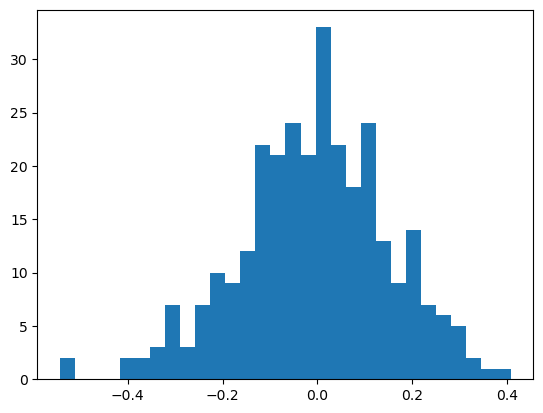

In [195]:
plt.hist(wv["Chicago"], bins=30)

In [197]:
# with a suggestion from google AI, start with a list of words, create a list of vectors, and
# convert both into a dataframe (which will handle the labels more nicely)
words = ['Chicago', "Boston", "Philadelphia", "lawyer", "attorney", "cook", "waiter", "thylacine", "wallaby"]
vectors = [wv[word] for word in words]
df = pd.DataFrame(vectors, index=words)


In [199]:
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Chicago,-0.078613,0.312500,-0.005524,0.408203,0.011047,0.215820,-0.414062,0.222656,0.081055,-0.144531,...,-0.016235,-0.053223,-0.090820,0.001503,0.040039,0.104004,0.004761,-0.244141,0.106445,-0.079590
Boston,-0.175781,0.190430,0.031982,0.275391,0.104980,0.047119,-0.283203,-0.147461,0.061768,-0.153320,...,0.215820,-0.062500,-0.005798,-0.138672,-0.053955,-0.006866,0.083008,-0.157227,-0.145508,-0.128906
Philadelphia,-0.019897,0.012817,-0.110352,0.096680,0.172852,-0.074707,-0.402344,0.112793,0.072754,-0.013428,...,0.075195,-0.076172,-0.164062,-0.005859,-0.088379,-0.052734,-0.019775,-0.034424,0.072754,-0.281250
lawyer,-0.030884,0.002121,-0.028442,-0.098633,0.091797,0.189453,-0.189453,-0.002991,0.166992,-0.165039,...,0.073730,-0.111328,-0.083008,-0.103516,-0.044922,0.074707,0.061523,-0.462891,0.168945,0.045654
attorney,-0.088379,-0.131836,-0.039795,-0.231445,-0.191406,-0.001930,-0.084961,0.000077,0.120605,-0.086426,...,0.062500,-0.105469,0.259766,-0.051025,0.035889,0.106934,0.098145,-0.640625,0.119629,0.025635
cook,-0.232422,0.090332,0.078125,0.126953,0.029785,0.371094,0.055664,-0.094238,-0.261719,0.036865,...,0.020508,0.118164,-0.511719,0.294922,-0.082520,-0.181641,0.015259,-0.209961,0.213867,0.170898
waiter,-0.231445,-0.125000,-0.026733,0.217773,-0.224609,0.187500,-0.091797,-0.037354,0.053955,0.204102,...,0.189453,0.030640,-0.161133,0.017090,0.261719,0.324219,-0.019897,-0.199219,0.113281,0.176758
thylacine,0.149414,-0.076172,-0.455078,0.310547,0.058350,-0.166992,0.107910,0.000284,0.451172,0.032959,...,-0.291016,0.053467,-0.077637,0.310547,0.388672,-0.059570,0.143555,0.081055,0.126953,0.035400
wallaby,0.304688,-0.197266,-0.419922,0.137695,-0.021851,-0.378906,-0.324219,-0.128906,0.040771,0.164062,...,-0.322266,0.191406,-0.253906,0.084473,0.190430,0.224609,-0.087402,0.314453,-0.153320,-0.072266


(0.0, 100.0)

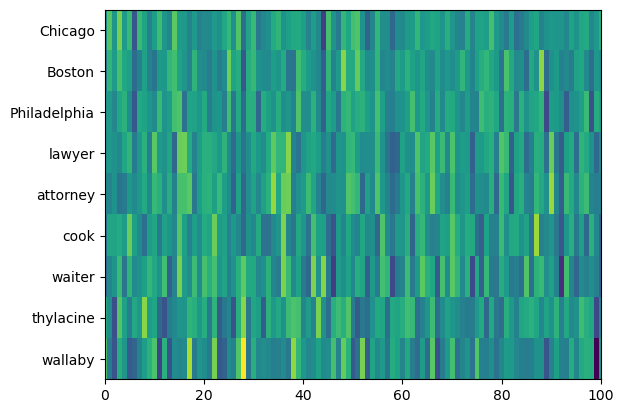

In [201]:
plt.imshow(df.to_numpy() , aspect="auto", interpolation="nearest") #, ylabels=words)
plt.yticks(range(len(words)), words)
plt.xlim([0,100])

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


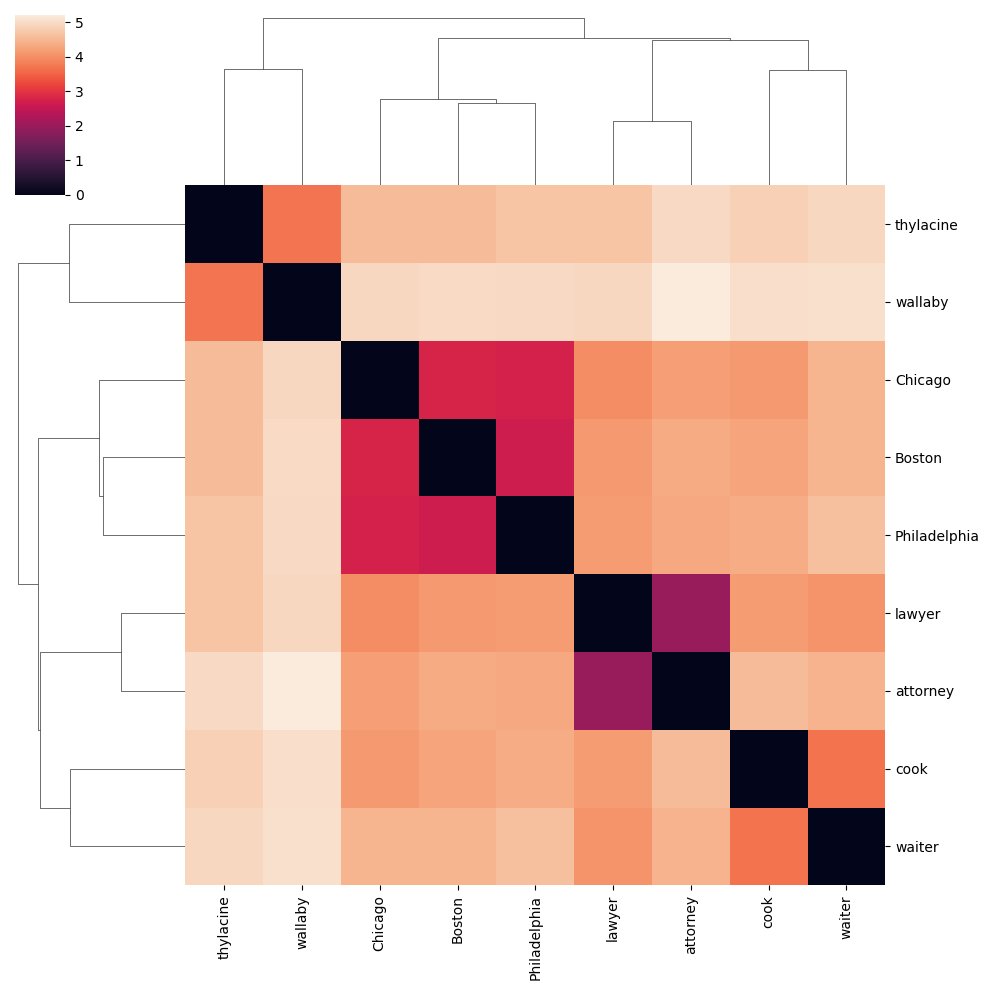

In [207]:
import seaborn as sns
sns.clustermap(d)

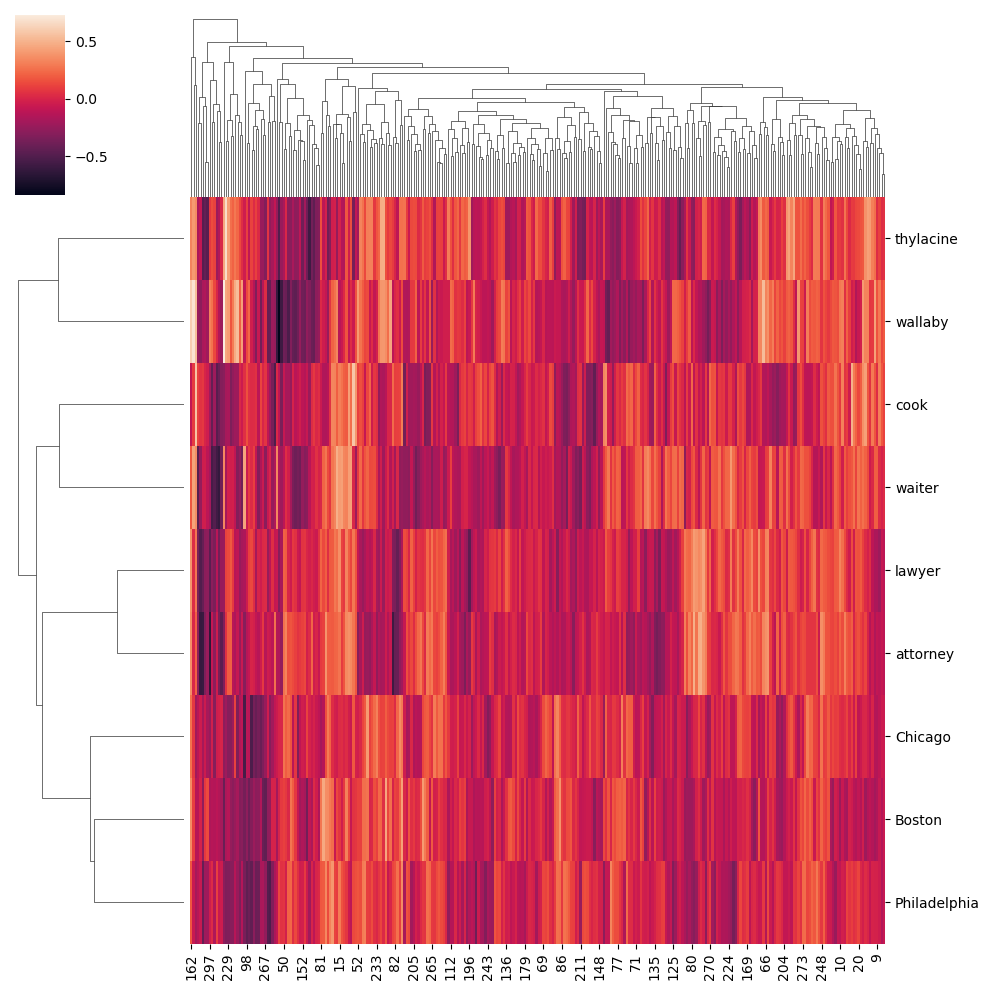

In [209]:
sns.clustermap(df)

In [203]:
# google code suggestion for "all-against-all distances pandas dataframe of vectors"
# clearly cdist does the n^2 / 2 distance calculations, and DataFrame just makes it pretty.
from scipy.spatial.distance import cdist

def pairwise_distances(df, metric='euclidean'):
    """Calculate pairwise distances for a DataFrame of vectors."""
    return pd.DataFrame(cdist(df.values, df.values, metric=metric), index=df.index, columns=df.index)


In [205]:
d = pairwise_distances(df)
d

,Chicago,Boston,Philadelphia,lawyer,attorney,cook,waiter,thylacine,wallaby
Chicago,0.000000,2.778726,2.737097,3.979777,4.180985,4.123878,4.473052,4.571631,4.932141
Boston,2.778726,0.000000,2.645776,4.129000,4.350466,4.274156,4.479605,4.580067,4.978263
Philadelphia,2.737097,2.645776,0.000000,4.155156,4.314192,4.365067,4.608956,4.677322,4.955131
lawyer,3.979777,4.129000,4.155156,0.000000,1.980331,4.170206,4.054652,4.677948,4.929516
attorney,4.180985,4.350466,4.314192,1.980331,0.000000,4.574945,4.441739,4.965839,5.214057
cook,4.123878,4.274156,4.365067,4.170206,4.574945,0.000000,3.680200,4.839304,5.045558
waiter,4.473052,4.479605,4.608956,4.054652,4.441739,3.680200,0.000000,4.929203,5.060112
thylacine,4.571631,4.580067,4.677322,4.677948,4.965839,4.839304,4.929203,0.000000,3.702884
wallaby,4.932141,4.978263,4.955131,4.929516,5.214057,5.045558,5.060112,3.702884,0.000000


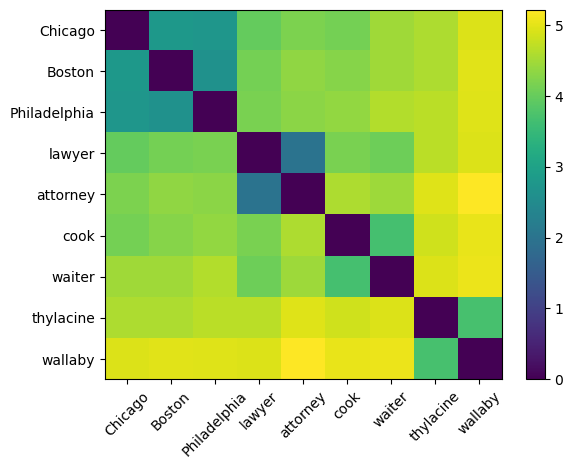

In [211]:
plt.imshow(d , aspect="auto", interpolation="nearest")

plt.yticks(range(len(words)), words)
plt.xticks(range(len(words)), words, rotation = 45)
plt.colorbar()

In [213]:
# Okay, this demo has wv.most_similar.. which takes a "positive" and a "negative" list of words
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html
print(wv.most_similar(positive=['mushroom'], topn=5))

[('mushrooms', 0.7716438174247742), ('chanterelle', 0.6103289127349854), ('wild_mushrooms', 0.6075051426887512), ('oyster_mushrooms', 0.5885806083679199), ('morels', 0.584884762763977)]


In [217]:
print(wv.most_similar(positive=['lawyers', "thylacine"], negative=["lawyer"], topn=5))


[('Tasmanian_tiger', 0.6182140111923218), ('thylacines', 0.5861539840698242), ('marsupials', 0.5328848361968994), ('extinct_mammals', 0.5313401818275452), ('weta', 0.5246051549911499)]


In [219]:
print(wv.most_similar(positive=[wv["air"]/2 + wv["water"] / 2 ], topn=4))
print(wv.most_similar(positive=[wv["air"]/2 + wv["fire"] / 2 ], topn=4))
print(wv.most_similar(positive=[wv["air"]/2 + wv["earth"] / 2 ], topn=4))
print(wv.most_similar(positive=[wv["water"]/2 + wv["earth"] / 2 ], topn=4))
print(wv.most_similar(positive=[wv["fire"]/2 + wv["earth"] / 2 ], topn=4))
print(wv.most_similar(positive=[wv["water"]/2 + wv["fire"] / 2 ], topn=4))


[('water', 0.8269957304000854), ('air', 0.8131176829338074), ('groundwater', 0.561946451663971), ('Warm_moist', 0.5601513385772705)]
[('fire', 0.8019238114356995), ('air', 0.7335823178291321), ('fires', 0.561204731464386), ('blaze', 0.5468231439590454)]
[('earth', 0.8230435252189636), ('air', 0.7564418911933899), ('Earth', 0.5994673371315002), ('planet', 0.5536783933639526)]
[('earth', 0.8220580816268921), ('water', 0.7739097476005554), ('Earth', 0.6038790345191956), ('watertable', 0.5714927911758423)]
[('earth', 0.7487156391143799), ('fire', 0.7414058446884155), ('blaze', 0.5521085262298584), ('fires', 0.5475512146949768)]
[('fire', 0.8059519529342651), ('water', 0.7595962882041931), ('Fire', 0.586625337600708), ('extinguish_blazes', 0.5837720632553101)]


In [ ]:
print(wv.most_similar(positive=['air', 'water'], topn=5))


In [221]:
# Let's just average everything together.. (This isn't going to bite us later, is it?)
def string_to_vec(s):
    N=300
    n=0
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        try:
            c = wv[token]
            t = t+c
            n = n+1
        except KeyError:
            pass
    return(t / n)

In [223]:
twittervectors = [string_to_vec(tweet) for tweet in tweets] 
twittervectors_small = [string_to_vec(tweet) for tweet in tweets[0:200]] 

In [ ]:
twitframe_small  = pd.DataFrame(twittervectors_small, index=tweets[0:200])


/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(**tight_params)


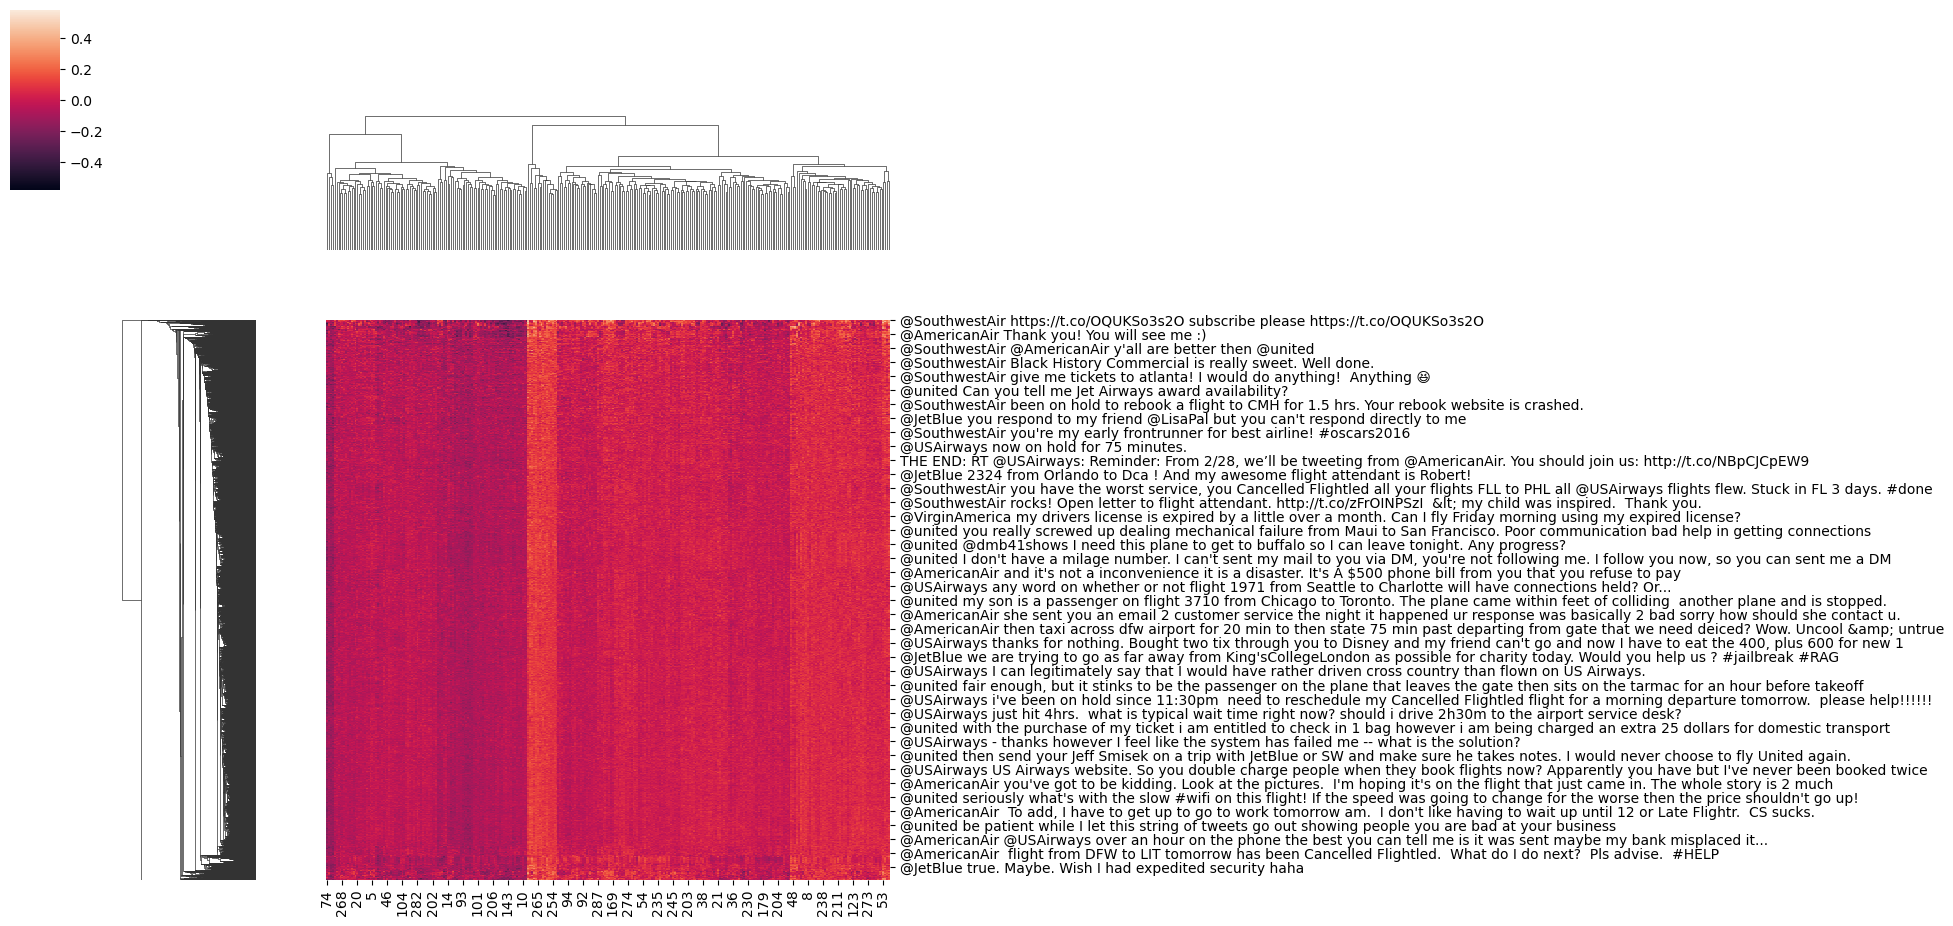

In [225]:
sns.clustermap(twitframe)

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/utils

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


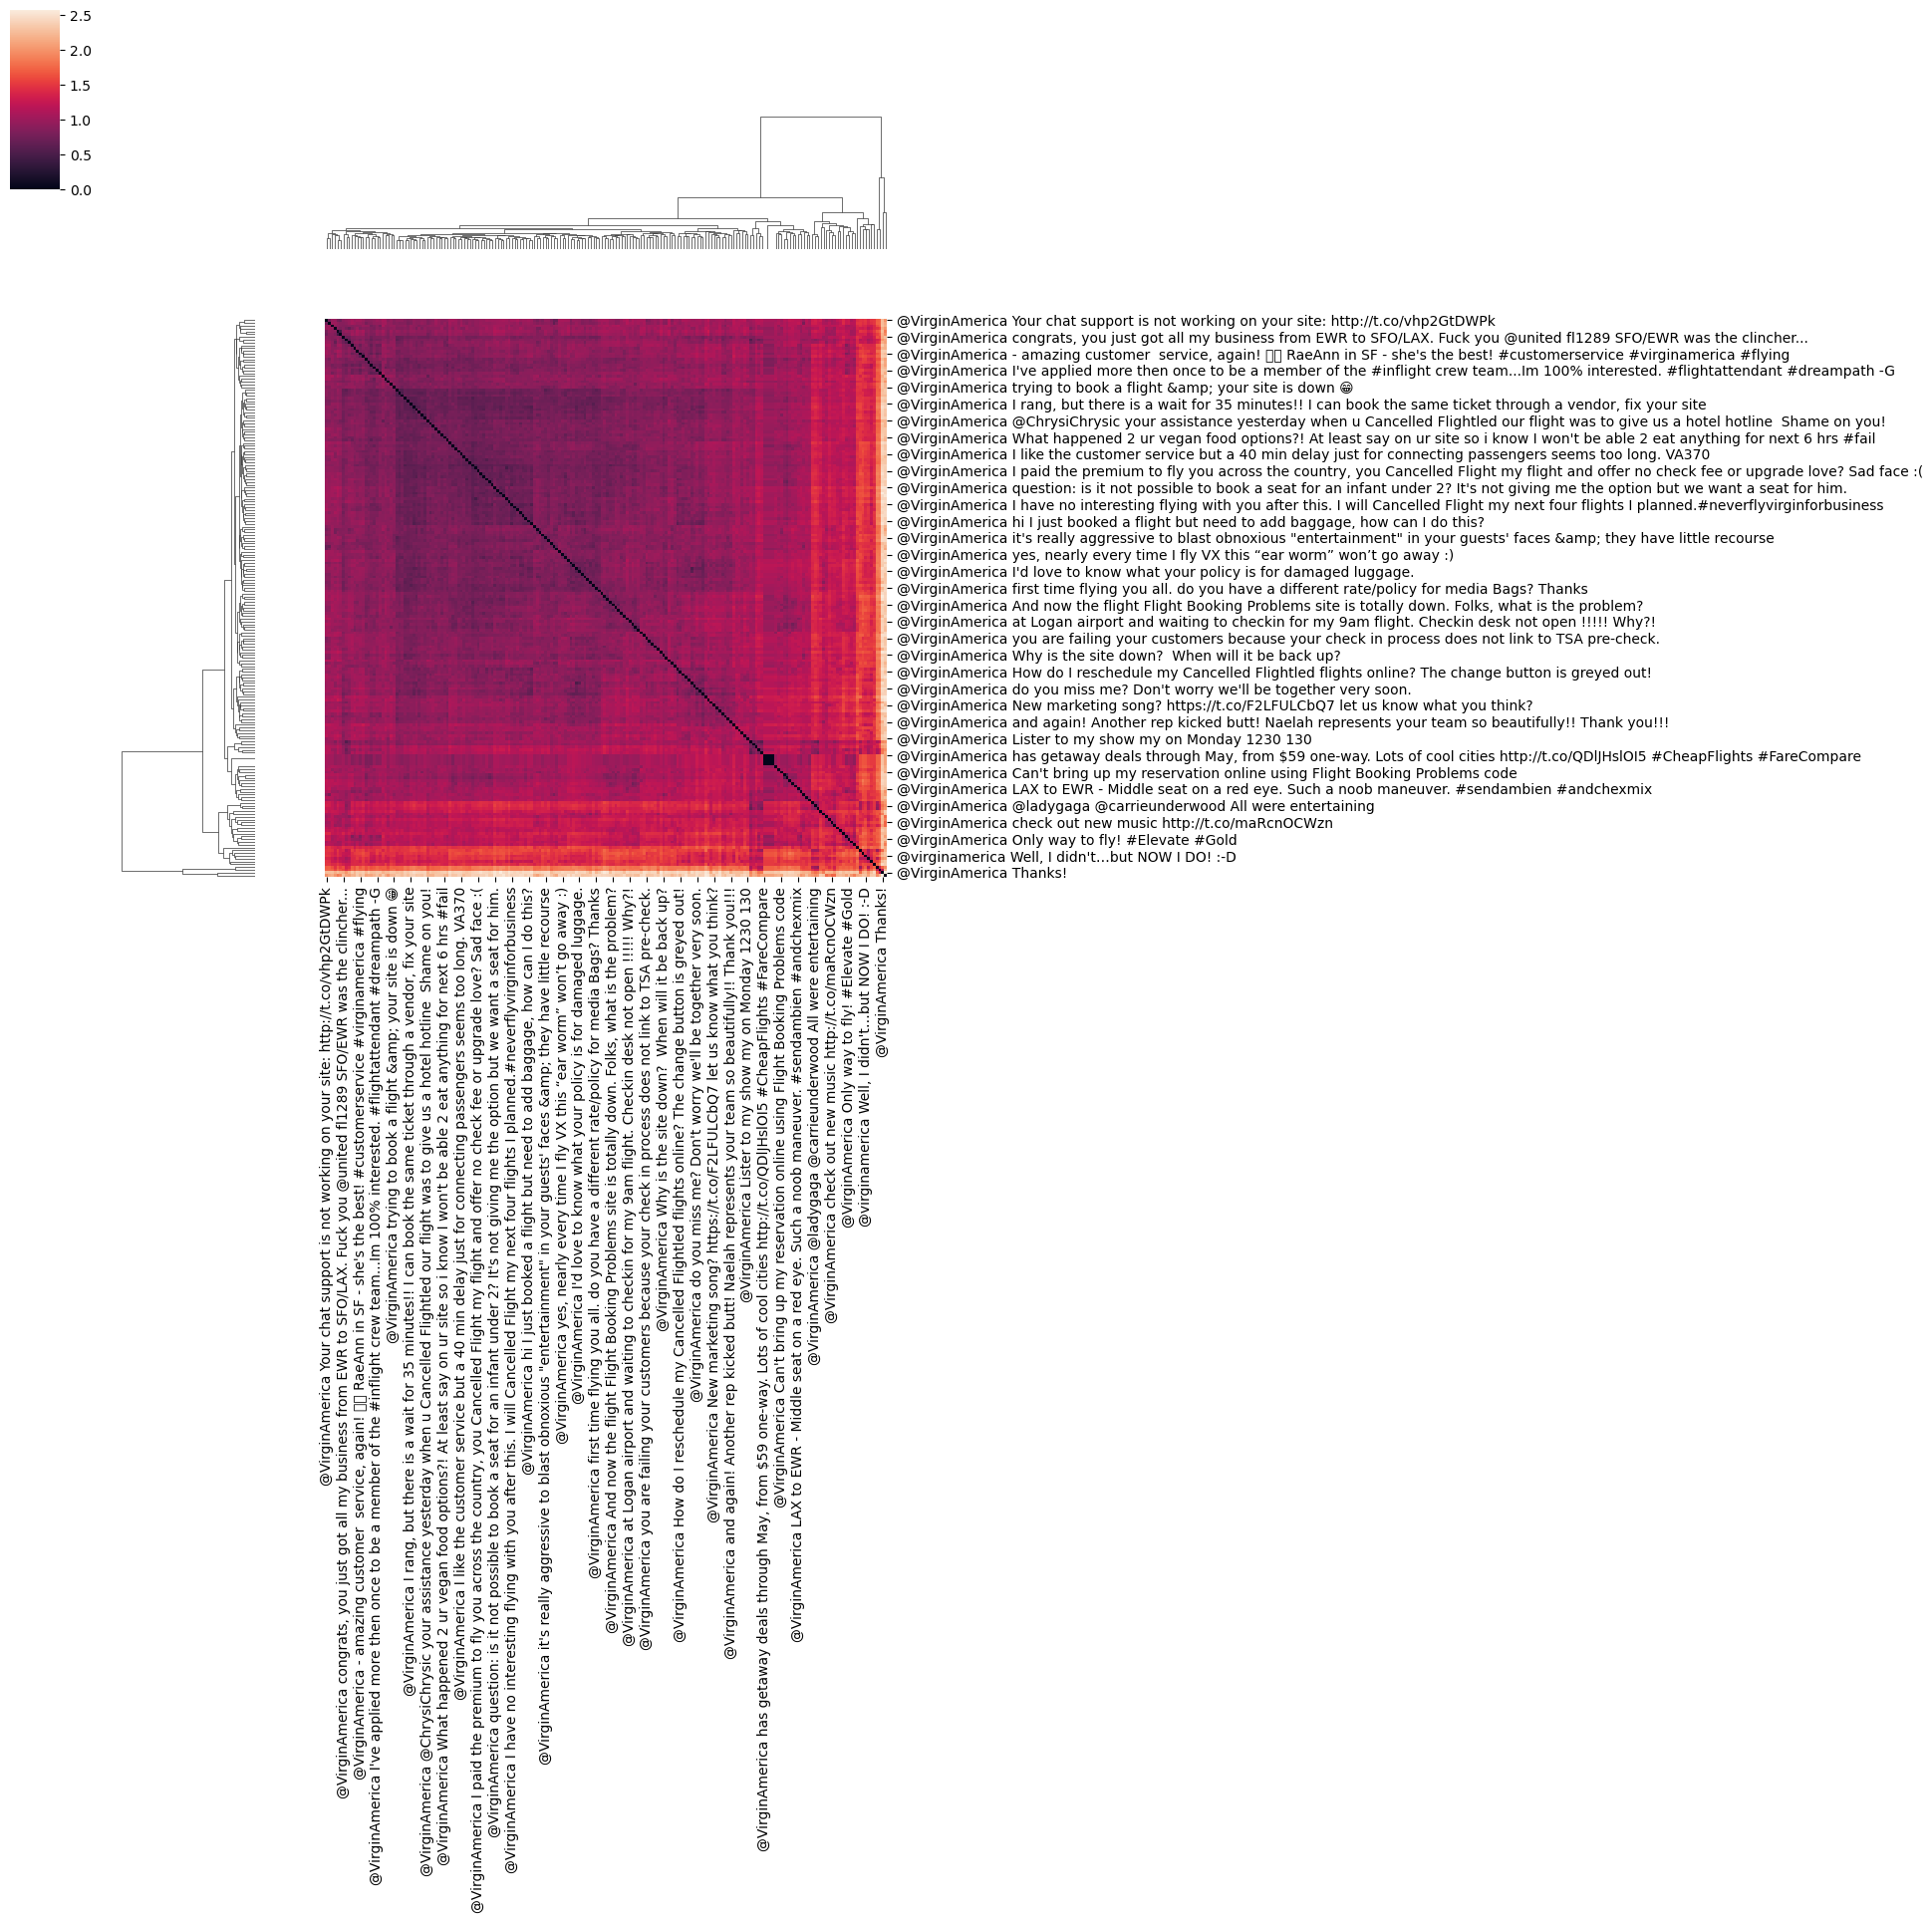

In [227]:
twit_d = pairwise_distances(twitframe_small)
sns.clustermap(twit_d)

(array([2.120e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 6.000e+00, 8.000e+00, 1.800e+01, 5.000e+01, 1.040e+02,
        2.020e+02, 3.720e+02, 4.860e+02, 7.540e+02, 9.860e+02, 1.142e+03,
        1.502e+03, 1.672e+03, 1.848e+03, 1.912e+03, 2.086e+03, 2.032e+03,
        2.068e+03, 1.928e+03, 1.894e+03, 1.734e+03, 1.644e+03, 1.372e+03,
        1.238e+03, 1.110e+03, 1.036e+03, 9.900e+02, 8.660e+02, 8.840e+02,
        6.900e+02, 7.220e+02, 6.340e+02, 5.840e+02, 5.020e+02, 4.460e+02,
        4.980e+02, 3.940e+02, 3.240e+02, 2.900e+02, 2.840e+02, 2.040e+02,
        2.200e+02, 1.840e+02, 1.420e+02, 9.800e+01, 8.400e+01, 7.400e+01,
        7.000e+01, 7.800e+01, 6.200e+01, 7.200e+01, 7.600e+01, 8.600e+01,
        9.800e+01, 6.000e+01, 4.800e+01, 2.400e+01, 2.600e+01, 1.400e+01,
        1.400e+01, 6.000e+00, 1.200e+0

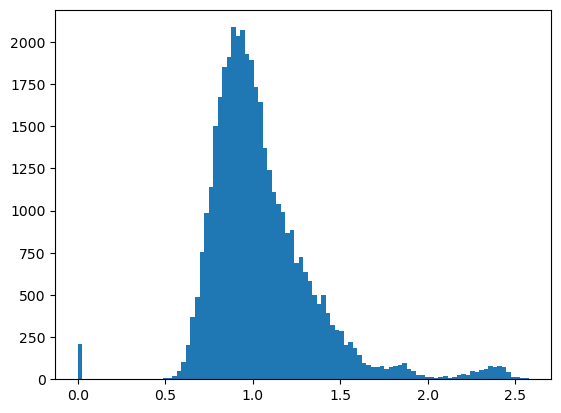

In [229]:
plt.hist(np.array(twit_d).reshape(-1), bins=100)

In [ ]:
print(wv.most_similar(positive=['disappointment'], topn=5))

In [ ]:
# Okay, Cookie, which one of these things is not like the others?
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

In [ ]:
print (wv.most_similar(positive=["Merced", "State"], negative=["City"]))

In [ ]:
print (wv.most_similar(positive=["Merced", "Chicago"], negative=["Illinois"]))

In [ ]:
print (wv.most_similar(positive=["Chicago", "State"], negative=["City"]))

In [ ]:
# https://radimrehurek.com/gensim/models/word2vec.html
from gensim.models import KeyedVectors

In [ ]:
vector = wv['computer']  # Get word2vec number for a word 
vector

In [ ]:
plt.hist(vector, bins=30)